In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

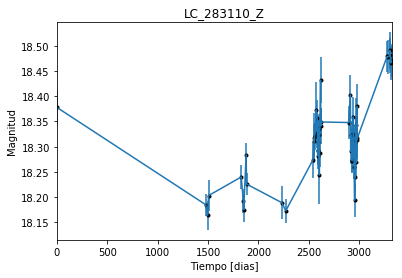

In [2]:
data = np.genfromtxt('LC_283110_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_283110_Z')
plt.savefig("LC_283110_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

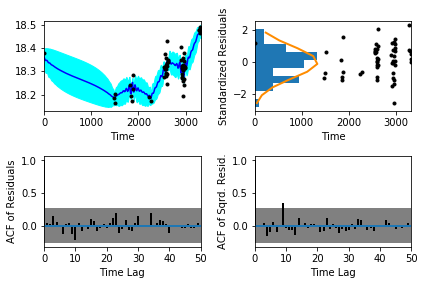

In [5]:
sample.assess_fit()

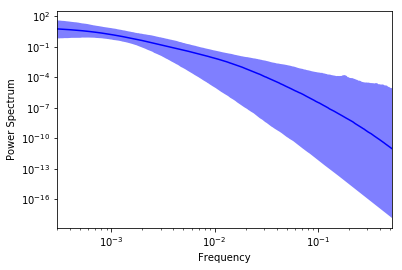

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

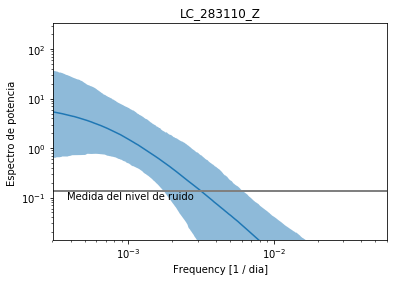

In [12]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_283110_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_283110_Z')

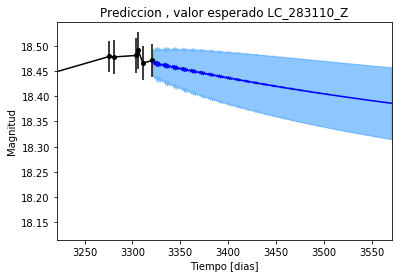

In [14]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_283110_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_283110_Z')

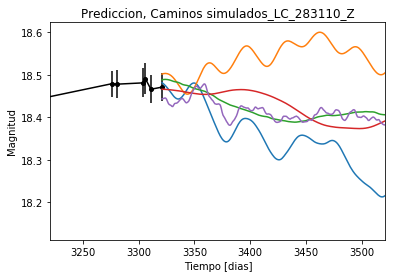

In [15]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_283110_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


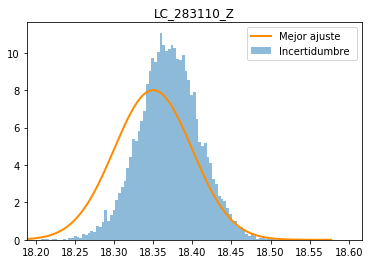

In [16]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_283110_Z')
plt.savefig("Mejor_ajuste_LC_283110_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_283110_Z')

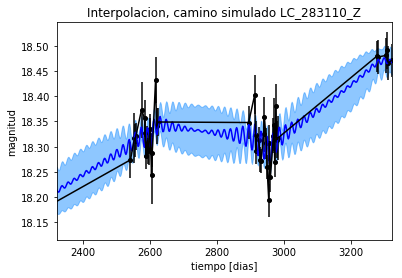

In [17]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_283110_Z')

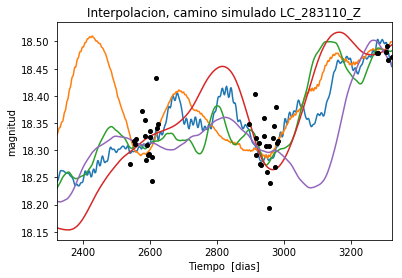

In [18]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_Z')

In [19]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [20]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 504.759873872
Median: 0.0153405997573
Standard deviation: 0.196995594751
68% credibility interval: [ 0.00125477  0.20459868]
95% credibility interval: [  3.80867488e-04   7.53445177e-01]
99% credibility interval: [  3.16666646e-04   9.95007193e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 508.372891151
Median: 0.00378005460957
Standard deviation: 0.103593034983
68% credibility interval: [ 0.00053685  0.05178947]
95% credibility interval: [  3.27671984e-04   3.45992111e-01]
99% credibility interval: [  3.06727746e-04   7.03525304e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 876.847780832
Median: 0.0373624678575


In [21]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 483.934334278
Median: 111.650328778
Standard deviation: 1.7934407288
68% credibility interval: [ 109.73387273  113.0855751 ]
95% credibility interval: [ 107.22431634  114.05694527]
99% credibility interval: [ 104.94528163  116.21740224]


In [22]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 507.949325281
Median: 0.905076326843
Standard deviation: 2.31273732904
68% credibility interval: [ 0.10531858  4.0920459 ]
95% credibility interval: [ 0.02001488  8.11861236]
99% credibility interval: [  0.01087839  10.64304507]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 378.157256465
Median: 0.648853605577
Standard deviation: 10.3489040581
68% credibility interval: [ 0.027116   9.4598025]
95% credibility interval: [  1.24728263e-0

In [23]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19452.961393
Median: 1.13621788728e-58
Standard deviation: 3.71879912832e+132
68% credibility interval: [  4.58367763e-100   1.46504240e-010]
95% credibility interval: [  6.31678019e-135   1.15298880e+060]
99% credibility interval: [  5.15776865e-169   4.38479809e+083]


In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3427.40877159
Median: 18.3071263861
Standard deviation: 0.063450983587
68% credibility interval: [ 18.25650959  18.36286079]
95% credibility interval: [ 18.18533754  18.43907366]
99% credibility interval: [ 18.1124662  18.5216015]


In [25]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 271.982737125
Median: 0.0285659928871
Standard deviation: 0.249562426138
68% credibility interval: [ 0.          0.39704246]
95% credibility interval: [ 0.          0.88832966]
99% credibility interval: [ 0.          1.00891004]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 271.982737125
Median: 0.0285659928871
Standard deviation: 0.249562426138
68% credibility interval: [ 0.          0.39704246]
95% credibility interval: [ 0.          0.88832966]
99% credibility interval: [ 0.          1.00891004]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1272.03266803
Median: 0.0
Standard deviation: 0.000479075767032
68% cr

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 483.934334278
Median: 111.650328778
Standard deviation: 1.7934407288
68% credibility interval: [ 109.73387273  113.0855751 ]
95% credibility interval: [ 107.22431634  114.05694527]
99% credibility interval: [ 104.94528163  116.21740224]


In [27]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1235.55554283
Median: 0.0118995452472
Standard deviation: 0.0185665968515
68% credibility interval: [ 0.0071706   0.02340776]
95% credibility interval: [ 0.00468979  0.05991803]
99% credibility interval: [ 0.00351892  0.11754821]


In [28]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1160.97840144
Median: 1.11406249392
Standard deviation: 0.192963609721
68% credibility interval: [ 0.94613895  1.3206864 ]
95% credibility interval: [ 0.80647277  1.55637751]
99% credibility interval: [ 0.71652465  1.72341012]


In [29]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 601.675608806
Median: 0.000279332151491
Standard deviation: 0.144408602301
68% credibility interval: [  2.04974565e-06   1.44426830e-02]
95% credibility interval: [  2.93730965e-65   3.91523554e-01]
99% credibility interval: [  9.31521729e-89   1.05857632e+00]


In [30]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 504.759873872
Median: (-0.0963878309981-0.208104123781j)
Standard deviation: 1.99770385332
68% credibility interval: [-1.28553145+0.j         -0.00788392-0.01105822j]
95% credibility interval: [ -4.73403567e+00+0.j          -2.39306100e-03-2.87446837j]
99% credibility interval: [ -6.25181457e+00+0.j          -1.98967522e-03-0.00560896j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 508.372891151
Median: (-0.0237507835832+0j)
Standard deviation: 1.69777342511
68% credibility interval: [-0.32540282+0.96674038j -0.00337313+0.07158183j]
95% credibility interval: [ -2.17393255e+00 +4.32830287e+00j  -2.05882380e-03 +5.60746143e-04j]
99% credibility interval: [ -4.42037985e+00 +6.52483366e+00j  -1.92722726e-03 +2.47033324e-